# MGT 595 Problem Set 4
# Author: Denglin Wu, Joanna Chen
# September 27, 2020


In this problem set you will evaluate and test asset pricing models using the time-series framework. You will use the Gibbons, Ross, Shanken (GRS) test discussed in class. The most difficult part of the problem set is the GRS test. It is a variant of Hotelling’s t2 test, discussed in the statistics literature. If you find the GRS article difficult to read, any multivariate text that covers the t2 test can be very helpful.  In addition, many articles that use this test have a short summary of the procedure.

In order to proceed you need Microsoft Excel and the file “Problem_Set4.xls”. This file contains four spreadsheets:

1)	30 industry value-weight portfolio returns

2)	10 portfolios formed on short-to-intermediate term past returns (from t 2 to t 12), *note that these portfolios start in 01/1927 rather than 07/1926

3)	25 portfolios formed on size and BE/ME,

4)	And, a proxy for the market portfolio (RM-RF).


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import f
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Manipulation

In [2]:
#--------------------Read subsheet 1--------------------
sheet1=pd.read_excel("Problem_Set4.xls", sheet_name='Industry portfolios (VW)', 
                     skiprows=2, index_col=None)
sheet1["Date"] = pd.to_datetime(sheet1["Unnamed: 0"], format="%Y%m")
VWreturn = sheet1.set_index("Date")
VWreturn = VWreturn.loc[VWreturn.index.dropna()]
VWreturn = VWreturn.drop("Unnamed: 0", axis = 1)

#--------------------Read subsheet 2--------------------
sheet2=pd.read_excel("Problem_Set4.xls", sheet_name='Past return portfolios', 
                     skiprows=8, index_col=None)
sheet2["Date"] = pd.to_datetime(sheet2["Date"], format="%Y%m")
pastreturn = sheet2.set_index("Date")
pastreturn = pastreturn.loc[pastreturn.index.dropna()]

#--------------------Read subsheet 3--------------------
sheet3=pd.read_excel("Problem_Set4.xls", sheet_name='25 size and BEME portfolios', 
                     skiprows=2, index_col=None)
sheet3["Date"] = pd.to_datetime(sheet3["BE/ME"], format="%Y%m")
BEME = sheet3.set_index("Date")
BEME = BEME.loc[BEME.index.dropna()]
BEME = BEME.drop("BE/ME", axis = 1)

#--------------------Read subsheet 4--------------------
sheet4=pd.read_excel("Problem_Set4.xls", sheet_name='Market, Rf', 
                     skiprows=1, index_col=None)
sheet4["Date"] = pd.to_datetime(sheet4["Unnamed: 0"], format="%Y%m")
rm_rf = sheet4.set_index("Date")
rm_rf = rm_rf.loc[rm_rf.index.dropna()]
rm_rf = rm_rf.drop("Unnamed: 0", axis = 1)

# Part I:  30 Value-Weight Industry portfolios



## a)	Using the 30 value-weighted industry portfolios, calculate the sample mean and standard deviation of returns for each of these portfolios. Is there a discernible pattern in the average returns or Sharpe-ratios of the portfolios?



In [3]:
VW_mean = VWreturn.mean()
VW_sd = VWreturn.std()
VW_sharpe = VW_mean/VW_sd
VW_summary = pd.DataFrame({'Mean': VW_mean, 'Standard Deviation': VW_sd, 'Sharpe Ratio':VW_sharpe})
VW_summary

,Mean,Standard Deviation,Sharpe Ratio
Food,0.988026,4.782731,0.206582
Beer,1.217278,7.287126,0.167045
Smoke,1.170037,5.818110,0.201103
Games,1.124911,9.003746,0.124938
Books,0.942479,7.210720,0.130705
Hshld,0.933442,5.879326,0.158767
Clths,0.953414,6.140737,0.155261
Hlth,1.106623,5.598703,0.197657
Chems,1.062900,6.326091,0.168018
Txtls,1.027016,7.711474,0.133180


(0.0, 0.25)

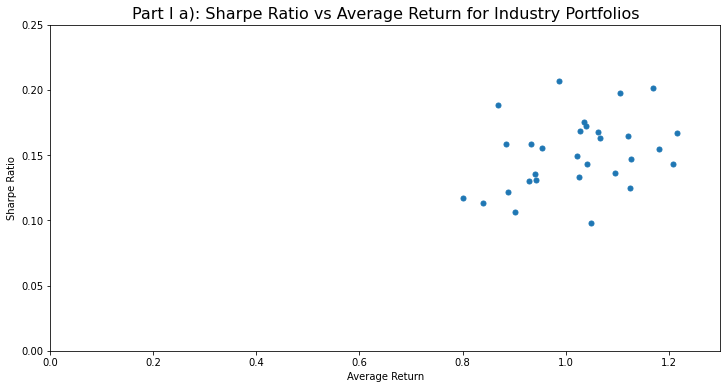

In [4]:
fig=plt.figure(figsize=(12,6))
plt.plot(VW_mean, VW_sharpe, '.', markersize=10)
plt.xlabel('Average Return')
plt.ylabel('Sharpe Ratio');
plt.title('Part I a): Sharpe Ratio vs Average Return for Industry Portfolios', fontsize=16)
plt.xlim(0, 1.3)
plt.ylim(0, 0.25)

In [5]:
x = sm.add_constant(VW_summary['Mean'])
mod1 = sm.OLS(VW_summary["Sharpe Ratio"],x, data = VW_summary).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sharpe Ratio   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     3.500
Date:                Mon, 28 Sep 2020   Prob (F-statistic):             0.0718
Time:                        01:36:00   Log-Likelihood:                 67.331
No. Observations:                  30   AIC:                            -130.7
Df Residuals:                      28   BIC:                            -127.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0669      0.045      1.478      0.151      -0.026       0.160
Mean           0.0825      0.044      1.871      0.072      -0.008       0.173
==============================================================================
Omnibus:                        0.729   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.694   Jarque-Bera (JB):                0.546
Skew:                           0.317   Prob(JB):                        0.761
Kurtosis:                       2.813   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By inspection, there is no discernible pattern in the average returns or Sharpe-ratios of the 30 portfolios.

Plotting Sharpe-ratios against average returns, we can also see that isn't a strong or discernible pattern between the two sets of data. There might be a positive relationship, but certainly a weak one at best.

We also run a regression between the Sharpe-ratios and returns, and the result shows that while there might be a positive relationshi (coefficient for mean of 0.0825), the average return could not really statistically explain much of Sharpe-ratios with a low R-squared of 0.111.

## b)	Estimate time series regressions, $R_{p t}-R_{f t}=a+\beta_{i M}\left(R_{M t}-R_{f t}\right)+e_{i t}, 
$for each of the 30 industry portfolios. Perform the multivariate GRS test; please report both the GRS F-statistic and its p-value. Use the market portfolio proxy RM-RF.

We are going to use the following formula to compute test statistic.
$$F_{test} = \frac{T-N-1}{N} \frac{\alpha^{\prime} \sum^{-1} \alpha}{1+\frac{\mu_{m}^{2}}{\sigma_{m}^{2}}}
$$

In [6]:
y = VWreturn.subtract(rm_rf['RF'],axis=0)
y = y[0:1069] # drop the last 4 NA rows
x = sm.add_constant(rm_rf['RM-RF'])[0:1069]

alpha = []
beta = []
eps = []

for pf in VWreturn.columns:
    y_in = y[pf]
    mod = sm.OLS(y_in,x,missing = 'drop').fit()
    alpha.append(mod.params[0])
    beta.append(mod.params[1])
    eps.append(mod.resid)

T = VWreturn.shape[0]
N = VWreturn.shape[1]

eps_df = pd.DataFrame(eps).T
var_cov = eps_df.cov() # (30,30)

# create Rm column in rm_rf
rm_rf['RM'] = rm_rf['RM-RF'] + rm_rf['RF']

F = ((T-N-1)/N)* ((alpha @ np.linalg.inv(var_cov) @ np.transpose(alpha)) / (1+(rm_rf['RM'][0:1069].mean()/rm_rf['RM'][0:1069].std())**2))
p_value = f.sf(F, N, T-N-1)
print("F statistic: ", F, "p value: ", p_value)

coeff_summary = pd.DataFrame({'industry':VWreturn.columns, 'alpha': alpha, 'beta': beta})
coeff_summary

F statistic:  1.8866758085893187 p value:  0.0028413192986861003


,industry,alpha,beta
0,Food,0.221191,0.742113
1,Beer,0.317012,0.946365
2,Smoke,0.475272,0.631790
3,Games,-0.064326,1.388714
4,Books,-0.061619,1.105308
5,Hshld,0.059851,0.905533
6,Clths,0.137579,0.817121
7,Hlth,0.277770,0.837047
8,Chems,0.102647,1.038191
9,Txtls,-0.000195,1.140688


Since $p = 0.028 < 0.05$, we reject the null hypothesis that the $\alpha$ values are 0, which means that the returns could not be entirely explained by the market portfolio proxy - in this case the excess market return (Rm - Rf). In other words, the market portfolio proxy for the test is not mean-variance efficient.

## c)	What is the null hypothesis of the GRS test (be precise), and how is this a test of the CAPM?  Explain intuitively the GRS test.  How do the time-series regressions implicitly estimate the beta risk premium?




$$
r_{i,t} - r_{f,t}=\alpha_{i}+\beta_{i} (R_{m,t} - r_{f,t} )+\varepsilon_{i,t} \space \forall i=1, \ldots \ldots, N
$$

$$
H_0: \alpha_{i}=0 \space \forall i=1, \ldots \ldots, N
$$

The null hypothesis of the GRS test is that, in the time-series regression, the $\alpha$ value for each asset is 0, which means there isn't any other factor that could explain the asset's return other than the market-portfolio's excess return.

Per the Sharpe-Lintner CAPM, the expected value of an asset i's excess return against another asset Z (usually the risk-free asset for simplicity), should be completely explained by the market-portfolio's excess return. Therefore:

$E[r_i - r_f] = \beta_i E[R_m - r_f]$

We can see that, for CAPM to be true, the intercept of the regression should be 0, and therefore the null hypothesis is that the $\alpha$ values be 0, and therefore the GRS test is a test of CAPM. A rejection of the null hypothesis means that the market-portfolio is not mean-variance efficient, that $\beta$ cannot completely captures the expected excess return of asset i, i.e. there are other factors that contributed to the excess return of asset i and those factors are now captured by $\alpha$.

Intuitively, the GRS test is a test of whether the Sharpe ratio of the market-portfolio is the maximum possible value. A rejection means that there is a more mean-variance efficient portfolio possible in the data, and therefore the current portfolio under the GRS test is not mean-variance efficient.

## d)	Comment on the sign and the magnitude of the intercepts.  Does the CAPM have difficulty pricing any portfolios in particular? Why?

(-0.5, 0.6)

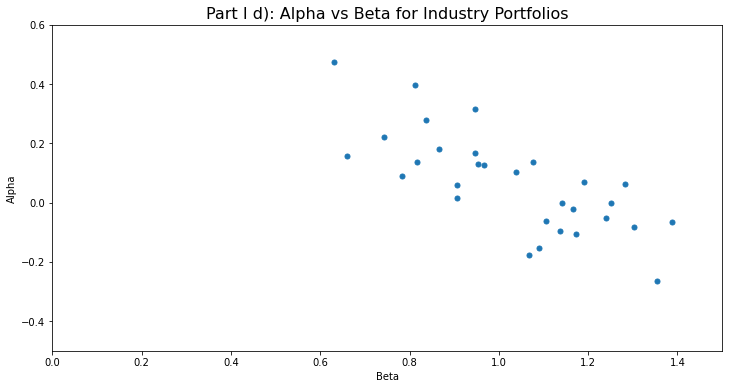

In [7]:
fig=plt.figure(figsize=(12,6))
plt.plot(coeff_summary['beta'], coeff_summary['alpha'], '.', markersize=10)
plt.xlabel('Beta')
plt.ylabel('Alpha');
plt.title('Part I d): Alpha vs Beta for Industry Portfolios', fontsize=16)
plt.xlim(0, 1.5)
plt.ylim(-0.5, 0.6)

Per the above graph of alpha vs beta, we can see that while the sign and magnitude of the intercept / $\alpha$ vary from -0.4 to 0.4, they do appear to be somewhat evenly distributed around 0. 

There also appear to be a negative relationship between $\alpha$ and $\beta$, centering around $\alpha$ = 0 and $\beta$ = 1. This centering makes sense, since according to CAPM the market as a whole should center around this value, i.e. market-portfolio explains the market entirely on its own without any other factor.

That notwithstanding, we can see that CAPM has difficulty pricing the portfolio with particularly high and low beta, such as the Smoke and Steel industries, as the corresponding intercept / $\alpha$ values are particularly high or particularly low. If we interprete $\beta$ to represent the volatility and riskiness of the asset comparing to the market-portfolio, this means that CAPM has difficulty capturing asset with very high and ver low risk / volatility, that there are additional factors beyond $\beta$ for these assets' returns.

# Part II:  10 Past Return portfolios

## e)	Repeat parts a), b), and d) for the 10 past return portfolios.


In [8]:
# Repeat a) for 10 past return portfolios
past_mean = pastreturn.mean()
past_sd = pastreturn.std()
past_sharpe = past_mean/past_sd
past_summary = pd.DataFrame({'Mean': past_mean, 'Standard Deviation': past_sd, 'Sharpe Ratio': past_sharpe})
past_summary

,Mean,Standard Deviation,Sharpe Ratio
Loser,0.302803,9.798304,0.030904
2,0.691421,8.077977,0.085593
3,0.748363,7.009402,0.106766
4,0.876877,6.382101,0.137396
5,0.880659,5.972757,0.147446
6,0.942963,5.827731,0.161806
7,1.024431,5.517353,0.185674
8,1.134779,5.363983,0.211555
9,1.211204,5.653341,0.214246
Winner,1.521853,6.509572,0.233787


(0.0, 0.25)

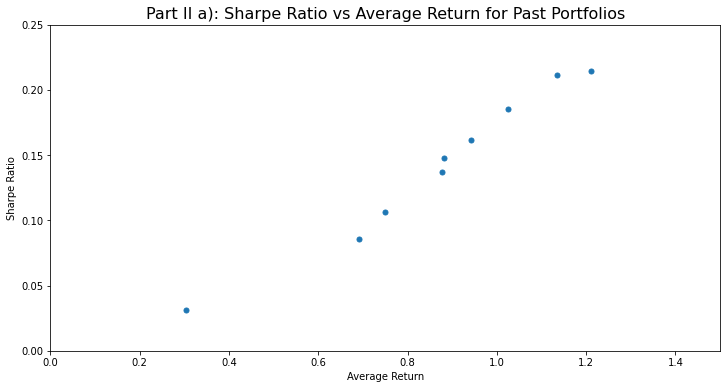

In [9]:
fig=plt.figure(figsize=(12,6))
plt.plot(past_mean, past_sharpe, '.', markersize=10)
plt.xlabel('Average Return')
plt.ylabel('Sharpe Ratio');
plt.title('Part II a): Sharpe Ratio vs Average Return for Past Portfolios', fontsize=16)
plt.xlim(0, 1.5)
plt.ylim(0, 0.25)

In [10]:
x = sm.add_constant(past_summary['Mean'])
mod2 = sm.OLS(past_summary["Sharpe Ratio"], x, data = past_summary).fit()
mod2.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sharpe Ratio   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     117.6
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           4.61e-06
Time:                        01:36:00   Log-Likelihood:                 27.620
No. Observations:                  10   AIC:                            -51.24
Df Residuals:                       8   BIC:                            -50.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0243      0.017     -1.421      0.193      -0.064       0.015
Mean           0.1883      0.017     10.846      0.000       0.148       0.228
==============================================================================
Omnibus:                        0.602   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.575
Skew:                          -0.416   Prob(JB):                        0.750
Kurtosis:                       2.171   Cond. No.                         6.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By inspection, there is a clear positive relationshipbetween the average returns and Sharpe-ratios for the past 10 return portfolios.

Plotting Sharpe-ratios against average returns, we can also see the strong and almost linear relationship between the two variables.

This is confirmed by running a regression between the Sharpe-ratios and returns, and the result shows a very strong positive relationship (coefficient for mean of 0.1883), with the average return statistically explaining large portion of the Sharpe-ratio with a high R-squared of 0.936.

In [11]:
# Repeat b) for 10 past return portfolios
new_rm_rf = rm_rf.iloc[6:1069]
y = pastreturn.subtract(new_rm_rf['RF'], axis=0)
x = sm.add_constant(rm_rf['RM-RF'])[6:1069]

alpha_1 = []
beta_1 = []
eps_1 = []

for pf in pastreturn.columns:
    y_in = y[pf]
    mod = sm.OLS(y_in, x, missing = 'drop').fit()
    alpha_1.append(mod.params[0])
    beta_1.append(mod.params[1])
    eps_1.append(mod.resid)

T = pastreturn.shape[0]
N = pastreturn.shape[1]

eps_df = pd.DataFrame(eps_1).T
var_cov = eps_df.cov() # (10,10)

F = ((T-N-1)/N)* ((alpha_1 @ np.linalg.inv(var_cov) @ np.transpose(alpha_1)) / (1+(new_rm_rf['RM'].mean()/new_rm_rf['RM'].std())**2))
p_value = f.sf(F, N, T-N-1)
print("F statistic: ", F, "p value: ", p_value)

coeff_summary_1 = pd.DataFrame({'industry':pastreturn.columns, 'alpha': alpha_1, 'beta': beta_1})
coeff_summary_1

F statistic:  6.49583143114609 p value:  8.67295161536779e-10


,industry,alpha,beta
0,Loser,-0.990460,1.556692
1,2,-0.452873,1.327348
2,3,-0.296916,1.174913
3,4,-0.116117,1.094417
4,5,-0.075635,1.037916
5,6,-0.009241,1.031621
6,7,0.112284,0.969952
7,8,0.245541,0.934681
8,9,0.301975,0.965458
9,Winner,0.574967,1.023433


Since $p$ ~ 0 < 0.05, we reject the null hypothesis that the $\alpha$ values are 0, which means that the returns could not be entirely explained by the market portfolio proxy - in this case the excess market return (Rm - Rf). In other words, we can conclude very strongly (more than in Part I) that the market portfolio proxy for the test is not mean-variance efficient.

This makes sense, as presumably the construction of these past portfolio involves skills of the portfolio manager, and therefore they should represent portfolios closer to mean-variance efficient.

(-1.1, 0.7)

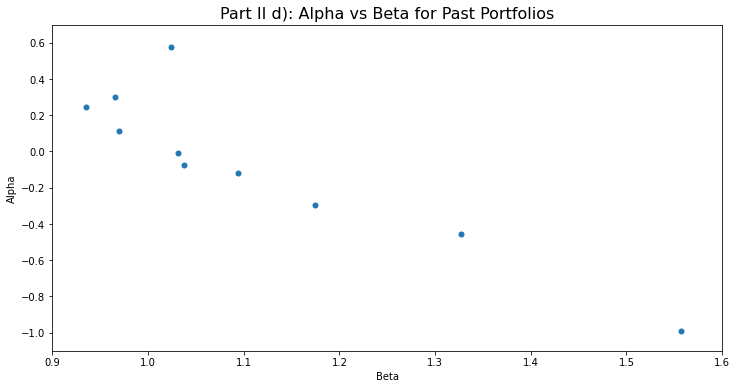

In [12]:
fig=plt.figure(figsize=(12,6))
plt.plot(coeff_summary_1['beta'], coeff_summary_1['alpha'], '.', markersize=10)
plt.xlabel('Beta')
plt.ylabel('Alpha');
plt.title('Part II d): Alpha vs Beta for Past Portfolios', fontsize=16)
plt.xlim(0.9, 1.6)
plt.ylim(-1.1, 0.7)

Per the above graph of alpha vs beta, we can see that sign and magnitude of the intercept / $\alpha$ vary from -1.0 to 0.6, with 6 out of 10 portfolios with negative $\alpha$ values. The sign of intercept are mostly negative for losers and positive for winners.

If we interprete $\alpha$ to be return not explained by market excess return, and to be the additional values created by the "skills" of portfolio managers, and $\beta$ to be riskiness, we can interestingly see the $\alpha$ vs $\beta$ plot somewhat resembles the shape of an efficient frontier. 

In the upper region, we see a positive relationship between $\alpha$ and $\beta$ with $\alpha$ above 0. This means that, while these portfolio takes on more risks, there is positive value created by the portfolio managers, i.e. higher risk higher return.

In the lower region, however, we see a negative relationship between $\alpha$ and $\beta$ with $\alpha$ below 0. This means that, while these portfolio takes on more risks, there is negative value created by the portfolio managers, i.e. value destroyed, higher risk lower return.

Particularly, CAPM has trouble valuing the very high $\beta$ portfolios. The explanation could be that the portfolio managers takes on so much risk that their "skills" is really destroying value beyond what the market can explain.

# Part III:  25 Size and BE/ME portfolios


## f)	Repeat parts a), b), and d) for the 25 size and BE/ME portfolios.


In [13]:
# Repeat a) for 25 BE/ME portfolios
BEME_mean = BEME.mean()
BEME_sd = BEME.std()
BEME_sharpe = BEME_mean/BEME_sd
BEME_summary = pd.DataFrame({'Mean': BEME_mean, 'Standard Deviation': BEME_sd, 'Sharpe Ratio': BEME_sharpe})
BEME_summary

,Mean,Standard Deviation,Sharpe Ratio
Low,0.852442,12.298305,0.069314
2,0.979478,9.878394,0.099154
3,1.290969,9.036835,0.142856
4,1.454362,8.353262,0.174107
High,1.642088,9.357638,0.175481
Low.1,0.903970,8.000691,0.112987
2.1,1.188565,7.512296,0.158216
3.1,1.292451,7.285716,0.177395
4.1,1.356505,7.479386,0.181366
High.1,1.516188,8.720361,0.173868


(0.0, 0.2)

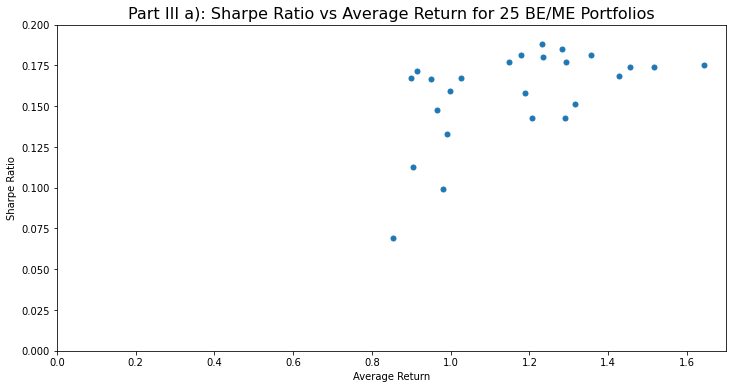

In [14]:
fig=plt.figure(figsize=(12,6))
plt.plot(BEME_mean, BEME_sharpe, '.', markersize=10)
plt.xlabel('Average Return')
plt.ylabel('Sharpe Ratio');
plt.title('Part III a): Sharpe Ratio vs Average Return for 25 BE/ME Portfolios', fontsize=16)
plt.xlim(0, 1.7)
plt.ylim(0, 0.2)

In [15]:
x = sm.add_constant(BEME_summary['Mean'])
mod3 = sm.OLS(BEME_summary["Sharpe Ratio"], x, data = BEME_summary).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sharpe Ratio   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     8.884
Date:                Mon, 28 Sep 2020   Prob (F-statistic):            0.00669
Time:                        01:36:01   Log-Likelihood:                 57.780
No. Observations:                  25   AIC:                            -111.6
Df Residuals:                      23   BIC:                            -109.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0756      0.028      2.690      0.013       0.017       0.134
Mean           0.0705      0.024      2.981      0.007       0.022       0.119
==============================================================================
Omnibus:                        5.062   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                3.474
Skew:                          -0.891   Prob(JB):                        0.176
Kurtosis:                       3.402   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By inspection, there is a positive relationship between the average returns and Sharpe-ratios for the 25 BEME portfolios.

Plotting Sharpe-ratios against average returns, we can see that while the positive relationship is clear between the two variables, there doesn't seem to be a strong linearity for the relationship

This is confirmed by running a regression between the Sharpe-ratios and returns, and the result shows a statistically significant positive relationship (coefficient for mean of 0.0705 with 95% confidence that the coefficient is positive), with the average return only statistically explaining a small portion of the Sharpe-ratio with a low R-squared of 0.279.

In [16]:
# Repeat b) for 25 BE/ME portfolios
y = BEME.subtract(rm_rf['RF'], axis=0)
x = sm.add_constant(rm_rf['RM-RF'])

alpha_2 = []
beta_2 = []
eps_2 = []

for pf in BEME.columns:
    y_in = y[pf]
    mod = sm.OLS(y_in, x, missing = 'drop').fit()
    alpha_2.append(mod.params[0])
    beta_2.append(mod.params[1])
    eps_2.append(mod.resid)

T = BEME.shape[0]
N = BEME.shape[1]

eps_df = pd.DataFrame(eps_2).T
var_cov = eps_df.cov() # (25,25)

F = ((T-N-1)/N)* ((alpha_2 @ np.linalg.inv(var_cov) @ np.transpose(alpha_2)) / (1+(rm_rf['RM'].mean()/rm_rf['RM'].std())**2))
p_value = f.sf(F, N, T-N-1)
print("F statistic: ", F, "p value: ", p_value)

coeff_summary_2 = pd.DataFrame({'portfolio':BEME.columns, 'alpha': alpha_2, 'beta': beta_2})
coeff_summary_2

F statistic:  3.100965441161561 p value:  5.484732409436894e-07


,portfolio,alpha,beta
0,Low,-0.487819,1.629464
1,2,-0.215404,1.405830
2,3,0.119874,1.369238
3,4,0.350471,1.265859
4,High,0.462160,1.382825
5,Low.1,-0.197538,1.262195
6,2.1,0.112254,1.223433
7,3.1,0.232663,1.198017
8,4.1,0.286559,1.213642
9,High.1,0.343007,1.372447


Since $p$ ~ 0 < 0.05, we reject the null hypothesis that the $\alpha$ values are 0, which means that the returns could not be entirely explained by the market portfolio proxy - in this case the excess market return (Rm - Rf). In other words, we can conclude very strongly (more than in Part I but not as strong as Part II) that the market portfolio proxy for the test is not mean-variance efficient.

This makes sense, as from previous lectures and problem sets we know that BE/ME is a strong indicator of the portfolio return, and therefore they should present as a factor to explain beyond the market-portfolio, which in this case can be concluded to not be mean-variance efficient.

(-0.5, 0.5)

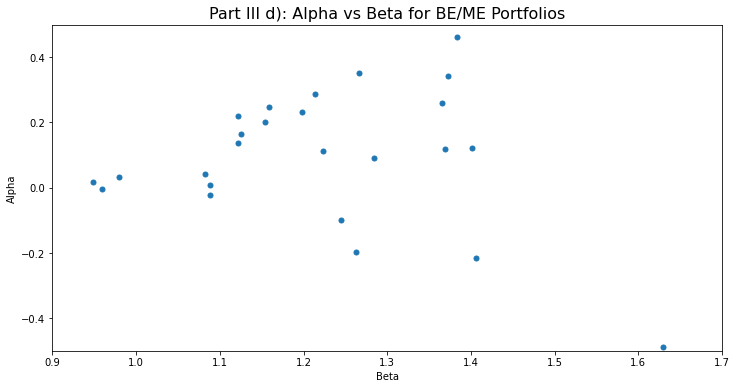

In [17]:
# Repeat d) for 25 BE/ME portfolios
fig=plt.figure(figsize=(12,6))
plt.plot(coeff_summary_2['beta'], coeff_summary_2['alpha'], '.', markersize=10)
plt.xlabel('Beta')
plt.ylabel('Alpha');
plt.title('Part III d): Alpha vs Beta for BE/ME Portfolios', fontsize=16)
plt.xlim(0.9, 1.7)
plt.ylim(-0.5, 0.5)

Per the above graph of alpha vs beta, we can see that sign and magnitude of the intercept / $\alpha$ vary from -0.5 to 0.5, with majority of the portfolios having positive $\alpha$ values. 

Similar to Part II, the upper cluster shows a positive relationship between $\alpha$ and $\beta$, indicating a higher riskiness brings a larger unexplanable portion of the return by the market-portfolio, and this unexplanable portion appears to be the BE/ME information. The lower cluster, with smaller amount of data, shows a negative relationship, indicating that there are portfolios with higher risk but lower return.

Again, CAPM has trouble valuing the high $\beta$ portfolios, as we can see the data shows a diverging trend from 0 as we move along the Beta axis. The could be because the book-to-market value / size has certain explanation power for the return, which from lectures and previous problem sets we've seen evidence to be true.


## g)	Repeat b) for the 25 size and BE/ME portfolios, but this time use the “in-sample” tangency portfolio of the 25 portfolios estimated over the entire sample period and use this portfolio in place of RM-RF.

•	Does the GRS test reject or fail to reject when you use the in-sample tangency portfolio as the market proxy?

•	Is this result surprising?

In [18]:
BEME_invcov_T = np.linalg.inv(BEME.cov()) # inverse cov. matrix, (25,25)
R = BEME.mean() # (25,)
rf = rm_rf['RF'].mean() # scalar
ones = np.transpose([1]*len(BEME.columns.tolist())) # (25,)
onesT = np.transpose(ones) # (25,)

num = BEME_invcov_T @ (R - rf * ones) 
denom = onesT @ BEME_invcov_T @ (R - rf)
weight_tang = num/denom # (25,)

new_RM00 = BEME @ weight_tang
new_BEME = BEME.copy()
new_BEME['Mkt-RF'] = new_RM00 - rm_rf['RF']

In [19]:
y = BEME.subtract(rm_rf['RF'], axis=0)
x = sm.add_constant(new_BEME['Mkt-RF'])

alpha_3 = []
beta_3 = []
eps_3 = []

for pf in BEME.columns:
    y_in = y[pf]
    mod = sm.OLS(y_in, x, missing = 'drop').fit()
    alpha_3.append(mod.params[0])
    beta_3.append(mod.params[1])
    eps_3.append(mod.resid)

T = BEME.shape[0]
N = BEME.shape[1]

eps_df = pd.DataFrame(eps_3).T
var_cov = eps_df.cov() # (25,25)

F = ((T-N-1)/N)* ((alpha_3 @ np.linalg.inv(var_cov) @ np.transpose(alpha_3)) / (1+(new_RM00.mean()/new_RM00.std())**2))
p_value = f.sf(F, N, T-N-1)
print("F statistic: ", F, "p value: ", p_value)

coeff_summary_3 = pd.DataFrame({'portfolio':BEME.columns, 'alpha': alpha_3, 'beta': beta_3})
coeff_summary_3

F statistic:  0.00012587155253799613 p value:  0.9999999999999999


,portfolio,alpha,beta
0,Low,-0.006774,0.229526
1,2,-0.003166,0.278521
2,3,-0.004666,0.402762
3,4,-0.003765,0.467263
4,High,-0.004664,0.542137
5,Low.1,-0.005612,0.249519
6,2.1,-0.004044,0.361866
7,3.1,-0.003263,0.402793
8,4.1,-0.002679,0.427988
9,High.1,-0.003428,0.491671


Since p=1>0.05 , we fail to reject the null hypothesis that the  $\alpha$  values are 0.

This is not surprising, since with the "in-sample" tangency portfolio, we  constructed a market-portfolio that is by design mean-variance efficient. Since the market-portfolio is mean-variance efficient, testing CAPM should return that $\beta$ alone explains the asset returns, and that there is no other unexplained factors that would manifest themselves as $\alpha$. Therefore, failing to reject the null hypothesis that the $\alpha$ values are 0 is not surprising.

## h)	Repeat g) using the “out-of-sample” tangency portfolio of the portfolios estimated over one half of the sample and then applied to returns of the other half and vice versa and then use this portfolio in place of RM-RF.  Use the same out-of-sample tangency portfolio you constructed for Problem Set 3:





### a.	First, we split the sample into two halves:  (1) take all observations from odd months in even years and even months in odd years (i.e., if starting in 1980, this would look like:  01/1980, 03/1980, . . . , 11/1980, 02/1981, 04/1981, . . . 12/1981, 01/1982, 03/1982, . . .); and (2) the opposite (take all observations from even months in even years and odd months in odd years).

In [20]:
# Split the sample
same_yr_month = []
diff_yr_month = []
for i, data in BEME.iterrows():
  if int(i.year) % 2 == 0:
    if int(i.month) % 2 == 0:
      same_yr_month.append(data)
    else:
      diff_yr_month.append(data)
  else:
    if int(i.month) % 2 == 0:
      diff_yr_month.append(data)
    else:
      same_yr_month.append(data)

diff_ = pd.DataFrame(diff_yr_month) # first half of data sample; odd in even, even in odd
same_ = pd.DataFrame(same_yr_month) # second half of data sample; even in even, odd in odd

### b.	Then, compute the tangency portfolio weights for the 25 portfolios using only the moments estimated from the first sample and apply them to returns in the second sample.

In [21]:
# tangency weight using first sample
diff_invcov_T = np.linalg.inv(diff_.cov()) # inverse cov. matrix, (25,25)
R = diff_.mean() # (25,)
rf = rm_rf['RF'].mean() # scalar
ones = np.transpose([1]*len(diff_.columns.tolist())) # (25,)
onesT = np.transpose(ones) # (25,)

num = diff_invcov_T @ (R - rf * ones) 
denom = onesT @ diff_invcov_T @ (R - rf)
weight_tang = num/denom # (25,)

# apply weights to the return in the second sample
new_RM = same_ @ weight_tang

### c.	Then, do the reverse---compute the tangency portfolio weights from the second sample and apply those to returns in the first sample.

In [22]:
same_invcov_T = np.linalg.inv(same_.cov()) # inverse cov. matrix, (25,25)
R = same_.mean() # (25,)
rf = rm_rf['RF'].mean() # scalar
ones = np.transpose([1]*len(same_.columns.tolist())) # (25,)
onesT = np.transpose(ones) # (25,)

num = same_invcov_T @ (R - rf * ones) 
denom = onesT @ same_invcov_T @ (R - rf)
weight_tang = num/denom # (25,)

# apply weights to returns in the first sample
new_RM2 = diff_ @ weight_tang



### d.	The resulting return series is your new tangency portfolio returns which you will use to repeat the cross-sectional tests.

Does the GRS test reject or fail to reject when you use the out-of-sample tangency portfolio as the market proxy?  Why?  Is this result surprising?


In [23]:
RM_concat = pd.concat([new_RM,new_RM2])
new_rm_rf = rm_rf.copy()
new_rm_rf['Mkt-RF'] = RM_concat - rm_rf['RF']

In [24]:
# Repeat b) for 25 BE/ME portfolios, use tangency portfolio instead 
# tangency weight
y = BEME.subtract(rm_rf['RF'], axis=0)
x = sm.add_constant(new_rm_rf['Mkt-RF'])

alpha_4 = []
beta_4 = []
eps_4 = []

for pf in BEME.columns:
    y_in = y[pf]
    mod = sm.OLS(y_in, x, missing = 'drop').fit()
    alpha_4.append(mod.params[0])
    beta_4.append(mod.params[1])
    eps_4.append(mod.resid)

T = BEME.shape[0]
N = BEME.shape[1]

eps_df = pd.DataFrame(eps_4).T
var_cov = eps_df.cov() # (25,25)

F = ((T-N-1)/N)* ((alpha_4 @ np.linalg.inv(var_cov) @ np.transpose(alpha_4)) / (1+(RM_concat.mean()/RM_concat.std())**2))
p_value = f.sf(F, N, T-N-1)
print("F statistic: ", F, "p value: ", p_value)

coeff_summary_4 = pd.DataFrame({'portfolio':BEME.columns, 'alpha': alpha_4, 'beta': beta_4})
coeff_summary_4

F statistic:  2.840833680387959 p value:  4.619385578755293e-06


,portfolio,alpha,beta
0,Low,0.135668,0.207608
1,2,0.253212,0.212130
2,3,0.350444,0.314202
3,4,0.435980,0.351293
4,High,0.444241,0.436790
5,Low.1,0.235026,0.184822
6,2.1,0.320055,0.279894
7,3.1,0.385889,0.298022
8,4.1,0.418962,0.312782
9,High.1,0.457697,0.370402


Since p=4.6e-06 < 0.05 , we reject the null hypothesis that the  $\alpha$  values are 0, which means that the returns could not be entirely explained by the market portfolio proxy - in this case the "out-of-sample" tangency portfolio. In other words, the market portfolio proxy for the test is not mean-variance efficient.

This result is suprising in the sense that the tangency portfolio should have provided a mean-variance efficient market-portfolio proxy. Instead, however, since we reject the null hypothesis that the $\alpha$ values are 0 with a very high degree of confidence, we can conclude that the constructed portfolio is not mean-variance efficient.

At the same time, perhaps this is not surprising, since we're using "out-of-sample" tangency portfolio, which uses cross validation to test the robustness of the model and the rejection of null hypothesis should be expected.


## i)	Repeat b) for the 25 size and BE/ME portfolios, but use the “in-sample” tangency portfolio of the 30 value-weight industry portfolios estimated over the entire sample period in place of RM-RF.  Comment on how well you price the 25 size and BE/ME portfolios.  Is this surprising?  Why or why not?



In [25]:
# Calculate tangency portfolio with value-weight industry portfolios
VW_invcov_T = np.linalg.inv(VWreturn.cov()) # inverse cov. matrix, (30,30)
R = VWreturn.mean() # (30,)
rf = rm_rf['RF'].mean() # scalar
ones = np.transpose([1]*len(VWreturn.columns.tolist())) # (30,)
onesT = np.transpose(ones) # (30,)

num = VW_invcov_T @ (R - rf * ones) 
denom = onesT @ VW_invcov_T @ (R - rf)
weight_tang = num/denom # (30,)

new_RM01 = VWreturn @ weight_tang
new_VW = VWreturn.copy()
new_VW['Mkt-RF'] = new_RM01 - rm_rf['RF']

# Repeat b) for 25 BE/ME portfolios, use tangency portfolio from value-weight industry portfolios 
# tangency weight
y = BEME.subtract(rm_rf['RF'], axis=0)[0:1069]
x = sm.add_constant(new_VW['Mkt-RF'])

alpha_5 = []
beta_5 = []
eps_5 = []

for pf in BEME.columns:
    y_in = y[pf]
    mod = sm.OLS(y_in, x, missing = 'drop').fit()
    alpha_5.append(mod.params[0])
    beta_5.append(mod.params[1])
    eps_5.append(mod.resid)

T = BEME.shape[0]
N = BEME.shape[1]

eps_df = pd.DataFrame(eps_5).T
var_cov = eps_df.cov() # (25,25)

F = ((T-N-1)/N)* ((alpha_5 @ np.linalg.inv(var_cov) @ np.transpose(alpha_5)) / (1+(new_RM01.mean()/new_RM01.std())**2))
p_value = f.sf(F, N, T-N-1)
print("F statistic: ", F, "p value: ", p_value)

coeff_summary_5 = pd.DataFrame({'portfolio':BEME.columns, 'alpha': alpha_5, 'beta': beta_5})
coeff_summary_5

F statistic:  3.120307283477878 p value:  4.669737377819426e-07


,portfolio,alpha,beta
0,Low,-0.358963,0.851889
1,2,-0.013847,0.654060
2,3,0.322608,0.628193
3,4,0.536174,0.581002
4,High,0.663400,0.640684
5,Low.1,-0.113427,0.676862
6,2.1,0.212173,0.636913
7,3.1,0.339979,0.611323
8,4.1,0.378468,0.634017
9,High.1,0.516122,0.657648


Since p=4.7e-07 < 0.05 , we reject the null hypothesis that the  $\alpha$  values are 0, which means that the returns could not be entirely explained by the market portfolio proxy - in this case tangency portfolio of the 30 value-weight industry portfolio. In other words, the market portfolio proxy for the test is not mean-variance efficient.

This result is suprising, since constructing the tangency portfolio should have provided a mean-variance efficient market-portfolio proxy. Instead, however, since we reject the null hypothesis that the $\alpha$ values are 0 with a very high degree of confidence, we can conclude that the constructed portfolio is not mean-variance efficient, and therefore the pricing is not too good since there is a portion ($\alpha$) unexplained by the model.

## j)	Repeat b) for the 25 size and BE/ME portfolios, but use the “in-sample” tangency portfolio of the 10 past return portfolios estimated over the entire sample period in place of RM-RF.  Comment on how well you price the 25 size and BE/ME portfolios.  Is this surprising?  Why or why not?


In [26]:
# Calculate tangency portfolio with 10 past return portfolios
pastreturn_invcov_T = np.linalg.inv(pastreturn.cov()) # inverse cov. matrix, (10,10)
R = pastreturn.mean() # (10,)
rf = rm_rf['RF'].mean() # scalar
ones = np.transpose([1]*len(pastreturn.columns.tolist())) # (10,)
onesT = np.transpose(ones) # (10,)

num = pastreturn_invcov_T @ (R - rf * ones) 
denom = onesT @ pastreturn_invcov_T @ (R - rf)
weight_tang = num/denom # (30,)

new_RM02 = pastreturn @ weight_tang
new_pastreturn = pastreturn.copy()
new_pastreturn['Mkt-RF'] = new_RM02 - rm_rf['RF']

# Repeat b) for 25 BE/ME portfolios, use tangency portfolio from 10 past return portfolios 
# tangency weight
y = BEME.subtract(rm_rf['RF'], axis=0)[6:1069]
x = sm.add_constant(new_pastreturn['Mkt-RF'])

alpha_6 = []
beta_6 = []
eps_6 = []

for pf in BEME.columns:
    y_in = y[pf]
    mod = sm.OLS(y_in, x, missing = 'drop').fit()
    alpha_6.append(mod.params[0])
    beta_6.append(mod.params[1])
    eps_6.append(mod.resid)

T = BEME.shape[0]
N = BEME.shape[1]

eps_df = pd.DataFrame(eps_6).T
var_cov = eps_df.cov() # (25,25)

F = ((T-N-1)/N)* ((alpha_6 @ np.linalg.inv(var_cov) @ np.transpose(alpha_6)) / (1+(new_RM02.mean()/new_RM02.std())**2))
p_value = f.sf(F, N, T-N-1)
print("F statistic: ", F, "p value: ", p_value)

coeff_summary_6 = pd.DataFrame({'portfolio':BEME.columns, 'alpha': alpha_6, 'beta': beta_6})
coeff_summary_6

F statistic:  3.0286743997399155 p value:  9.978022954484747e-07


,portfolio,alpha,beta
0,Low,-0.163137,0.425591
1,2,0.024265,0.398396
2,3,0.444150,0.335541
3,4,0.575461,0.346443
4,High,0.804020,0.323331
5,Low.1,-0.170906,0.458961
6,2.1,0.227432,0.397240
7,3.1,0.329080,0.393365
8,4.1,0.440632,0.371227
9,High.1,0.570419,0.382324


Since p=1e-06 < 0.05 , we reject the null hypothesis that the  $\alpha$  values are 0, which means that the returns could not be entirely explained by the market portfolio proxy - in this case tangency portfolio of the 10 past return portfolio. In other words, the market portfolio proxy for the test is not mean-variance efficient.

Again, the result is suprising, since constructing the tangency portfolio should have provided a mean-variance efficient market-portfolio proxy. Instead, however, since we reject the null hypothesis that the $\alpha$ values are 0 with a very high degree of confidence, we can conclude that the constructed portfolio is not mean-variance efficient, and therefore the pricing is not too good since there is a portion ($\alpha$) unexplained by the model.


## k)	Report the correlation matrix of the returns on the tangency portfolios of the 30 value-weighted industries, 10 past return portfolios, and 25 size and BE/ME portfolios.  Comment on these correlations in light of the results you found in i) and j).

In [27]:
# Three portfolios: 
# (1) new_RM00: 25 size and BE/ME from g; (2) new_RM01: 30 value-weight from i; (3) new_RM02: 10 past return from j
corr_df = pd.DataFrame({'25 size and BE/ME':new_RM00,'30 value-weight':new_RM01,'10 past return':new_RM02})
corr_df.corr()

,25 size and BE/ME,30 value-weight,10 past return
25 size and BE/ME,1.000000,0.238821,0.225475
30 value-weight,0.238821,1.000000,0.364494
10 past return,0.225475,0.364494,1.000000


From the correlation matrix, we can see that the correlation between the 25 size-BE/ME portfolio and both the 30 value-weight portfolio, and the 10 past return portfolio are low.

When we solve the problem, if the different sets of assets give same output, the set of assets we use in the problem is similar. Correlation of tangency portfolio tells us the underlying sets of assets. Conversely, low correlation means sets of assets give different information and capture different part of market. In other words, if these sets of assets are representatives of market portfolio and the null hypothesis of GRS test is failed to reject, that means the set of assets have high correlation. In our problem, such low correlations doesn't seem surprising as they correspond to the results in i) and j); both GRS tests reject $\alpha = 0$ that means the sets of assets are different, therefore the correlation is low. 



In g), when we're using the tangency portfolio from the 25 size-BE/ME as market-proxy, we can see that with very high confidence we fail to reject that $\alpha$ = 0, indicating that the portfolio as market-proxy is mean-variance efficient. On the other hand, in both i) and j), when we're using the tangency portfolio from 30 value-weight portfolio and 10 past return portfolio as market-proxy, we can see that with very high confidence we reject $\alpha$ = 0, indicating that the portfolio as market-proxy is NOT mean-variance efficient. Therefore, it should be expected that the two non mean-variance efficient portfolio (30 value-weight and 10 past return) have low correlation with the mean-variance efficient portfolio, the 25 size-BE/ME one.